# Otimização de Teclado

## Introdução

### O Primeiro Teclado

Os teclados que usamos hoje em nossos computadores, celulares e outros dispositivos eletrônicos têm uma história que remonta ao século XIX. Naquela época, as pessoas usavam uma máquina de escrever para escrever cartas, livros e outras formas de comunicação. A primeira máquina de escrever bem-sucedida comercialmente foi a "Sholes and Glidden Type Writer", inventada em 1868 nos Estados Unidos.

**Essa máquina de escrever usava um teclado com uma disposição diferente das letras em comparação com o teclado que usamos hoje. Naquele tempo, as letras eram organizadas em ordem alfabética, começando com a letra "A" no canto superior esquerdo e terminando com a letra "Z" no canto inferior direito.** Isso pode parecer estranho para nós hoje, mas naquela época, as pessoas estavam acostumadas a escrever a mão e não tinham um teclado padrão para seguir.

O teclado QWERTY foi inventado por Christopher Sholes em 1873, para ser usado na máquina de escrever. **A ideia de Sholes era projetar um teclado que pudesse reduzir a colisão de tipos das barras da máquina de escrever, que costumavam ficar presas umas nas outras.**

![Sholes and Glidden Type Writer](../images/Figure-6.jpg)

Para conseguir isso, Sholes alterou a disposição das teclas, colocando as letras mais comuns na língua inglesa em posições que fossem menos propensas a colisões. Ele também separou as teclas das vogais, que são usadas com menos frequência do que as consoantes, para que os datilógrafos pudessem digitar mais rapidamente sem que as barras da máquina de escrever colidissem.

No entanto, **a disposição das teclas do teclado QWERTY não foi baseada em estudos científicos ou em pesquisas rigorosas. Em vez disso, foi desenvolvida por tentativa e erro e foi aperfeiçoada com o tempo.** Acredita-se que Sholes tenha testado muitas disposições diferentes das teclas antes de chegar à disposição final do teclado QWERTY.

Apesar de ser amplamente utilizado, o teclado QWERTY tem sido criticado por ser ineficiente. Em resposta, vários novos layouts de teclado foram desenvolvidos, como o **Dvorak Simplified Keyboard**, que foi projetado para ser mais eficiente do que o QWERTY. No entanto, o QWERTY ainda é o layout de teclado mais amplamente utilizado no mundo.

**Visto que o teclado QWERTY tem suas ineficiências e seu desenvolvimento foi feito através da tentativa e erro, há uma oportunidade de criar um teclado mais eficiente se baseando em dados e pesquisas.**

O objetivo da otimização da localização das teclas do teclado desse projeto é **minimizar a distância que deve ser percorrida entre um clique de uma tecla e outro.** Isso pode melhorar a eficiência e velocidade da digitação, reduzindo o tempo necessário para mover os dedos entre as teclas.

Existem vários layouts alternativos de teclado que foram desenvolvidos para minimizar essa distância, como o Dvorak Simplified Keyboard e o Colemak. Esses layouts colocam as letras mais comuns em posições mais acessíveis e reduzem o movimento dos dedos, resultando em uma digitação mais rápida e precisa.

A otimização da localização das teclas do teclado pode melhorar a produtividade dos usuários, resultando em uma experiência de digitação mais eficiente e agradável. Portanto, explorar as opções de layout de teclado alternativo pode ser útil para encontrar a melhor configuração para suas necessidades específicas.

### Algorítimo Genético

Um algoritmo genético é uma técnica de otimização que se baseia nos princípios biológicos da evolução natural para encontrar soluções para problemas complexos. A solução candidata é representada por um cromossomo, composto por um conjunto de genes que codificam as características da solução. Cada gene é uma variável que pode assumir um valor específico, correspondente a uma possível solução para o problema.

O algoritmo começa com uma população inicial de cromossomos gerados aleatoriamente. Em seguida, é realizada uma avaliação de cada solução candidata, utilizando uma função de aptidão que mede o quão bem ela atende aos critérios do problema. Os cromossomos com maior aptidão são selecionados para reprodução, gerando novas soluções candidatas através de operadores genéticos como a combinação e a mutação dos cromossomos pais.

Os algoritmos genéticos são amplamente utilizados em diversas áreas, como a engenharia, a computação, a biologia, a economia e a ciência da informação, entre outras. Eles são capazes de lidar com problemas complexos e não-lineares, permitindo a otimização de soluções em tempo razoável.

Os principais operadores que compõem um algoritmo genético são:

1. Evaluation (Avaliação): Nesta etapa, cada solução candidata é avaliada utilizando uma função de aptidão que mede o quão bem ela atende aos critérios do problema.

2. Selection (Seleção): Após a avaliação, os cromossomos com maior aptidão são selecionados para reprodução. Existem várias estratégias de seleção, incluindo seleção por torneio, seleção proporcional à aptidão e seleção elitista.

3. Crossover (Cruzamento): Nesta etapa, os cromossomos selecionados para reprodução são combinados para gerar novas soluções candidatas. O operador de cruzamento combina os genes de dois cromossomos pais, produzindo novos cromossomos filhos que são uma mistura dos cromossomos pais.

4. Mutation (Mutação): A mutação é um operador que introduz variação na população, alterando aleatoriamente um ou mais genes em um cromossomo. A mutação pode ser importante para evitar que o algoritmo fique preso em mínimos locais e para garantir a diversidade da população.

![Algoritimo Genético](../images/gadiagram.svg)

---

## Código

Premissas do projeto:
- O teclado é otimizado para digitação com um dedo apenas (com mais dedos para vir no futuro).
- Espaço são ignorados (Erro).
- Não é utilizado crossover no algorítimo.

### Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from tqdm import tqdm
np.random.seed(42)

---

### Função de Plot do Teclado

A criação da função para plotar o teclado teve como motivação a necessidade de uma visualização mais clara e interativa do layout das teclas. Através da plotagem do teclado, é possível ver como as teclas estão dispostas e como elas podem ser otimizadas para melhorar a eficiência e velocidade da digitação.

Para isso, foi definido também as coordenadas de cada tecla. A posição de cada tecla foi definida de acordo com a imagem a seguir:

![Sholes and Glidden Type Writer](../images/keyboard_coordinates.png)

Os teclados das máquinas de escrever antigas tinham 4 linhas de teclas e cada tecla era acionada por uma barra de tipos. Para evitar que as barras colidissem, as linhas de teclas eram defasadas em 1/4 de posição, permitindo que as barras se movessem sem obstrução e evitando que as teclas se prendessem.

In [2]:
# Cria um dicionário vazio para armazenar as coordenadas de cada tecla
keys_coords = {}

# Adiciona as coordenadas da linha superior das teclas numéricas e de função
keys_coords[0] = {i: np.array([0, i]) for i in range(10)}

# Adiciona as coordenadas da linha do meio das teclas alfabéticas
keys_coords[1] = {i: np.array([1, i + 0.25]) for i in range(10)}

# Adiciona as coordenadas da linha inferior das teclas alfabéticas e teclas de pontuação
keys_coords[2] = {i: np.array([2, i + 0.75]) for i in range(9)}

# Combina todas as coordenadas em uma única lista e a converte em uma matriz numpy transposta
coords = np.array(sum([list(i.values()) for i in list(keys_coords.values())],
                      []),
                  dtype=np.float64).T

# Cria uma lista com todas as teclas do teclado QWERTY (incluindo letras e sinais de pontuação)
qwerty_keys = [i for i in 'qwertyuiopasdfghjklçzxcvbnm,.']

In [3]:
def plot_keyboard(keys):
    """
    Plota o teclado QWERTY com as teclas especificadas

    Args:
        keys (list): lista contendo as teclas na ordem a serem exibidas

    Returns:
        None
    """
    fig, ax = plt.subplots(figsize=(13, 5))
    ax.scatter(coords[1], 1 - coords[0], color='black', marker='s', lw=50)
    ax.scatter(coords[1], 1 - coords[0], color='white', marker='s', lw=40)
    for n, i in enumerate(keys):
        ax.text(coords[1][n],
                1 - coords[0][n],
                i.upper(),
                fontsize=30,
                verticalalignment='center',
                horizontalalignment='center')
    ax.set_xlim(-1, 10)
    ax.set_ylim(-2, 2)
    plt.axis('off')
    plt.show()

Foi feita uma convenção que o string em ordem vai ser plotado das seguintes maneiras no teclado.

Exemplos de plots:

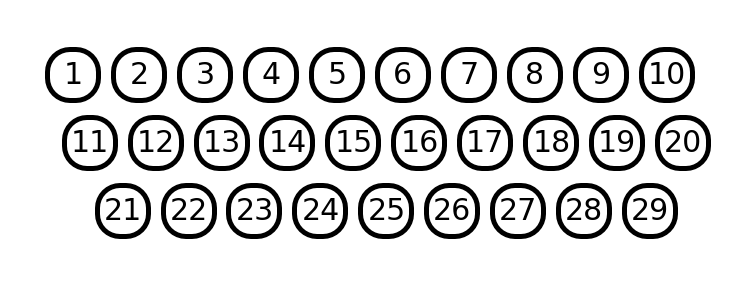

In [4]:
plot_keyboard([str(i) for i in range(1,len(qwerty_keys)+1)])

In [5]:
''.join(qwerty_keys)

'qwertyuiopasdfghjklçzxcvbnm,.'

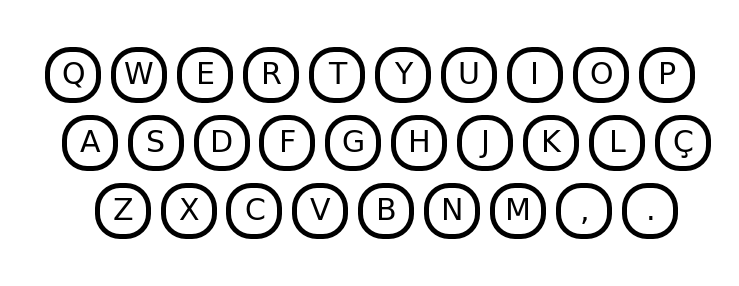

In [6]:
plot_keyboard(qwerty_keys)

---

Para criar um teclado que **minimizasse a distância percorrida entre as teclas**, foram utilizados dados de textos para calcular a frequência de combinações de letras seguidas. A partir desses dados, foi possível calcular a distância entre cada dupla de letras e multiplicá-la pela quantidade de ocorrências para obter a pontuação de cada dupla de letras.

Ao somar todas as pontuações, foi possível obter a pontuação total do teclado. Quanto menor a pontuação, menor a distância que deve ser percorrida entre as teclas e, portanto, mais eficiente o teclado é para a digitação.

Para os dados, foi utilizada uma base de dados do kaggle chamada [Brazilian Portuguese Sentiment Analysis Datasets](https://www.kaggle.com/datasets/fredericods/ptbr-sentiment-analysis-datasets?resource=download). Essa base contém dados de reviews de grandes varejistas brasileiras. A descrição da base segue:
- A B2W Digital, uma das empresas de comércio eletrônico mais proeminentes da América Latina, lançou o B2W-Reviews01, um corpus aberto de avaliações de produtos com mais de 130.000 avaliações de usuários. Este conjunto de dados tem duas características de destino: o rótulo binário "recomenda a um amigo" e uma classificação de usuário de 1 a 5 estrelas.

In [7]:
# Lê a coluna 'review_text_processed' do arquivo csv
text = pd.read_csv('../data/b2w.csv')

In [8]:
text

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1
...,...,...,...,...,...,...,...,...
132368,41993,SMARTHPHONE PERFEITO MUITO BOM E A ECONO...,smarthphone perfeito muito bom e a econo...,"['smarthphone', 'perfeito', 'muito', 'bom', 'e...",1.0,5,10,10
132369,97639,Eu estou muito chateado com isso gostaria que ...,eu estou muito chateado com isso gostaria que ...,"['eu', 'estou', 'muito', 'chateado', 'com', 'i...",0.0,1,10,10
132370,95939,"Vale a pena pelo preço oferecido, qualidade a ...","vale a pena pelo preco oferecido, qualidade a ...","['vale', 'pena', 'pelo', 'preco', 'oferecido',...",NaN,3,-1,10
132371,117952,O produto anunciado no site dizia ser 100% al...,o produto anunciado no site dizia ser 100% al...,"['produto', 'anunciado', 'no', 'site', 'dizia'...",0.0,1,10,10


In [9]:
# Junta todas as strings em uma única string
text = ' '.join(text['review_text_processed'].tolist())

# Cria uma lista com todas as letras, números e sinais de pontuação do texto
text = [i for i in text if i in 'qwertyuiopasdfghjklçzxcvbnm,.']

# Junta todos os caracteres da lista em uma única string
text = ''.join(text)

# Cria uma lista com todas as tuplas de caracteres consecutivos no texto
text = list(zip(text, text[1:]))

# Cria uma série pandas a partir da lista de tuplas e conta quantas vezes cada tupla aparece no texto
text = pd.Series(text)
text = text.value_counts()

In [10]:
text

(e, n)    276824
(t, o)    254243
(r, a)    252854
(r, e)    247589
(c, o)    237623
           ...  
(c, w)         8
(g, z)         5
(w, x)         4
(z, y)         4
(w, z)         1
Length: 782, dtype: int64

Outra opção de base é a do Buscapé:

As funções ***get_points*** e ***mutation*** fazem parte de um algoritmo de otimização que visa encontrar a melhor sequência de teclas do teclado QWERTY para digitação de um texto específico.

A função ***get_points*** calcula a pontuação de uma determinada sequência de caracteres no teclado QWERTY. Ela recebe como argumento uma lista com todas as teclas do teclado e utiliza um objeto pandas para mapear cada caractere do teclado às suas coordenadas correspondentes. Em seguida, extrai as tuplas de caracteres consecutivos do objeto text e calcula a distância euclidiana entre as coordenadas de cada par de caracteres consecutivos, multiplicando-a pela frequência de ocorrência de cada par. Por fim, retorna a soma dos resultados.

Já a função ***mutation*** realiza uma mutação aleatória em uma sequência de caracteres. Ela recebe como argumento uma string representando a sequência de caracteres a ser mutada. A função converte a sequência de caracteres em um array numpy, seleciona aleatoriamente um subconjunto dos caracteres e realiza uma mutação neles, alterando a ordem em que os caracteres são dispostos na sequência. Por fim, converte o array numpy resultante de volta em uma string e a retorna.

Ambas as funções são utilizadas no algoritmo de otimização para gerar novas sequências de teclas com base nas sequências existentes e avaliar a pontuação de cada uma delas. O objetivo do algoritmo é encontrar a melhor sequência de teclas do teclado QWERTY para digitação do texto especificado, a partir de uma população inicial de sequências geradas aleatoriamente.

In [11]:
def get_points(keyboard):
    """
    Retorna a pontuação de uma sequência de caracteres no teclado especificado.

    Args:
        keyboard (list): Uma lista com todas as teclas do teclado.

    Returns:
        float: A pontuação da sequência de caracteres.
    """
    # Cria um objeto pandas que mapeia cada caractere do teclado às suas coordenadas correspondentes
    conversion = pd.Series(dict(zip(keyboard, coords.T)))

    # Extrai as tuplas de caracteres consecutivos do objeto text e cria um DataFrame pandas com elas
    a = pd.DataFrame(np.array([list(i) for i in text.index.tolist()]))

    # Calcula a distância euclidiana entre as coordenadas de cada par de caracteres consecutivos e as multiplica pela frequência de ocorrência de cada par
    return (text.values * (a[0].apply(lambda i: conversion[i]) -
                           a[1].apply(lambda i: conversion[i])).apply(
                               np.linalg.norm).values).sum()


def mutation(key,seed=1):
    """
    Realiza uma mutação aleatória em uma sequência de caracteres.

    Args:
        key (str): A sequência de caracteres a ser mutada.

    Returns:
        str: A sequência de caracteres resultante da mutação.
    """
    # Converte a sequência de caracteres em um array numpy
    key = np.array([i for i in key])
    
    # Determina a random seed para geração aleatoria
    #random.seed(seed)
    
    # Seleciona aleatoriamente um subconjunto dos caracteres e realiza uma mutação neles
    change = random.sample(range(len(qwerty_keys)),
                           int(len(qwerty_keys) * mutation_proportion))
    key[change] = np.array(
        random.sample(key[change].tolist(),
                      int(len(qwerty_keys) * (mutation_proportion))))

    # Converte o array numpy resultante de volta em uma string
    return ''.join(key)

As variáveis ***mutation_proportion***, ***top_best_keys***, ***generation_size*** e ***generations*** são utilizadas para ajustar a otimização realizada pelo algoritmo.

A variável ***mutation_proportion*** define a proporção de mutação a ser usada em cada iteração do algoritmo. Ela determina a porcentagem de caracteres da sequência que serão selecionados aleatoriamente e terão sua ordem alterada.

A variável ***top_best_keys*** define o número de teclas que serão mantidas em cada geração do algoritmo. Após a avaliação da pontuação de cada sequência, apenas as ***top_best_keys*** sequências com melhor pontuação serão mantidas, enquanto as demais serão descartadas.

A variável ***generation_size*** define o tamanho de cada geração do algoritmo. Ela determina quantas sequências serão geradas aleatoriamente em cada geração.

Por fim, a variável ***generations*** define o número de gerações que serão executadas pelo algoritmo. Ela determina quantas iterações serão realizadas pelo algoritmo para encontrar a melhor sequência de teclas do teclado QWERTY para digitação do texto especificado.

Ao ajustar essas variáveis, é possível controlar a velocidade de convergência do algoritmo e o tempo necessário para encontrar a melhor sequência de teclas. Alterações nas variáveis podem levar a diferentes resultados de otimização, o que permite que o algoritmo seja adaptado para diferentes situações e necessidades.

In [12]:
# Define a proporção de mutação a ser usada
mutation_proportion = 3/29

# Define o número de teclados a serem mantidas em cada geração
top_best_keys = 10

# Define o tamanho de cada geração
generation_size = 200

# Define o número de gerações a serem executadas
generations = 60

As variáveis ***generation*** e ***generations_history*** são usadas para guardar o histórico de gerações geradas pelo algoritmo, enquanto ***stats*** é usado para armazenar as estatísticas de cada geração, como a pontuação mínima e média.

A primeira linha do código cria uma série pandas com ***generation_size*** listas aleatórias de teclas, cada uma contendo todas as teclas do teclado QWERTY embaralhadas de forma aleatória. Em seguida, a função apply() é usada para converter cada lista de teclas em uma única string, através da função lambda que junta cada elemento da lista em uma única string.

A variável ***generations_history*** é uma lista que será usada para armazenar todas as gerações geradas pelo algoritmo, enquanto a variável ***stats*** é uma lista que armazena as estatísticas de cada geração. No código, a lista generations_history é inicializada com a primeira geração gerada aleatoriamente.

Por fim, a função ***get_points()*** é usada para calcular a pontuação da geração inicial, que é armazenada em ***stats*** através da função agg(). A pontuação mínima e média da geração são calculadas e armazenadas em uma lista, que será usada posteriormente para plotar um gráfico com a evolução da pontuação das gerações ao longo do tempo.

In [13]:
# Cria uma série pandas com 'generation_size' listas aleatórias de teclas
generation = []
for i in range(generation_size):
    random.seed(i)
    generation.append(random.sample(qwerty_keys, len(qwerty_keys)))
generation = pd.Series(generation)

# Converte cada lista de teclas em uma única string
generation = generation.apply(lambda i: ''.join(i))

# Cria uma lista para armazenar o histórico de gerações geradas
generations_history = [generation]

# Calcula a pontuação da geração inicial e armazena o valor mínimo e médio
stats = [generation.apply(get_points).agg(['min', 'mean'])]

O código abaixo é responsável por executar a otimização genética. Durante cada iteração, uma nova geração é gerada a partir da geração atual, sofrendo mutações aleatórias em suas sequências de teclas.

- O loop for é executado na quantidade de gerações especificada (***generations***)
- A linha generation = pd.Series(...) seleciona as ***top_best_keys*** melhores sequências de teclas da geração atual e cria uma nova geração a partir delas. Essa linha utiliza as funções apply() e sort_values() para ordenar a geração atual em ordem crescente de pontuação e selecionar as ***top_best_keys*** melhores sequências. Em seguida, a nova geração é gerada a partir dessas sequências.
- A linha generation = generation.apply(mutation) realiza uma mutação aleatória em cada sequência de teclas da nova geração.
- A linha generations_history.append(generation) adiciona a nova geração ao histórico de gerações, que é armazenado na lista generations_history.
- A linha stats.append(generation.apply(get_points).agg(['min', 'mean'])) calcula a pontuação da nova geração utilizando a função get_points(), e armazena as estatísticas de pontuação mínima e média na lista stats.

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [03:41<00:00,  3.70s/it]


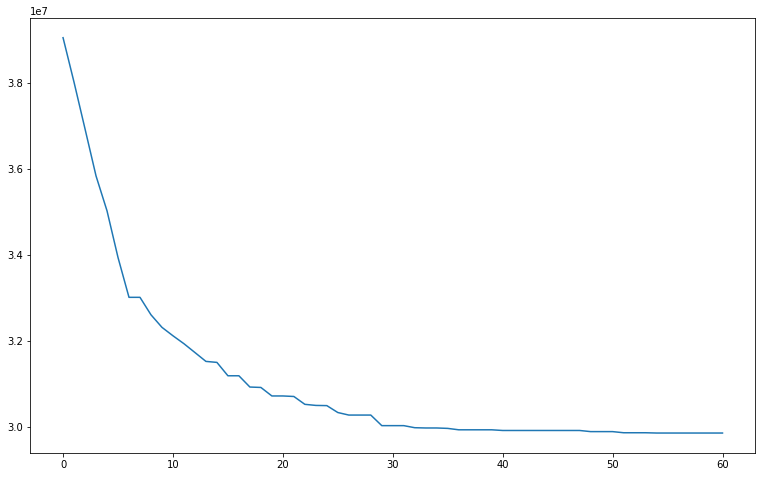

In [14]:
# Executa as próximas 'generations' gerações
for i in tqdm(range(generations)):
    # Seleciona as 'top_best_keys' melhores sequências de teclas da geração atual e gera uma nova geração a partir delas
    generation = pd.Series(
        int(generation_size / top_best_keys) * generation[generation.apply(
            get_points).sort_values().index[:top_best_keys]].values.tolist())

    # Realiza uma mutação aleatória em cada sequência de teclas da nova geração
    generation = generation.apply(mutation)

    # Adiciona a nova geração ao histórico de gerações
    generations_history.append(generation)

    # Calcula a pontuação da nova geração e armazena o valor mínimo e médio
    stats.append(generation.apply(get_points).agg(['min', 'mean']))

# Converte a lista 'stats' em um DataFrame pandas e adiciona os índices
stats = pd.concat([pd.DataFrame(i).T for i in stats])
stats.index = range(stats.shape[0])

# Cria um DataFrame pandas com o histórico de todas as gerações geradas
df_generations = pd.DataFrame(generations_history)

# Encontra a melhor sequência de teclas encontrada em todas as gerações e armazena em 'best_key'
best_key = df_generations.T.iloc[
    df_generations.iloc[stats['min'].argmin()].apply(get_points).argmin(),
    stats['min'].argmin()]

# Cria um gráfico da evolução da pontuação mínima ao longo das gerações
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(stats['min'])

---

### Resultado

Os resultados da otimização mostram que, em geral, as teclas mais utilizadas tendem a ser agrupadas no centro do teclado, enquanto as menos utilizadas são colocadas nas extremidades. Isso se deve ao fato de que, dessa forma, os usuários têm um acesso mais rápido e fácil às letras mais comuns, sem precisar mover as mãos ou os dedos grandes distâncias.

In [15]:
best_key

'çjbpradlgzyx,moenuvwkh.cstifq'

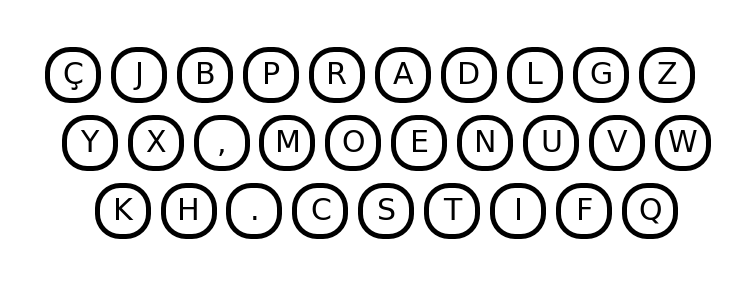

In [16]:
plot_keyboard(best_key)

### Melhorias

- Otimizar para digitação com mais dedos.
- Não ignorar os espaços.
- Aplicar o crossover no algorítimo.